In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

# Lecture 24 #

## The `percentile` Function ##

In [2]:
# Manually compute the 55th percentile of the array below.
arr = make_array(43, 20, 51, 7, 28, 34)

In [3]:
# 1. Sort the data.
arr = np.sort(arr)
arr

array([ 7, 20, 28, 34, 43, 51])

In [4]:
# 2. Find out what index would correspond to the 55th percentile.
0.55 * len(arr)

3.3000000000000003

In [5]:
# 3. Choose the number at that index
arr.item(3)

34

In [6]:
# In one line of code:
percentile(55, arr)

34

### Discussion Question ###

In [7]:
# Discussion question
another_arr = make_array(1, 3, 5, 7, 9)

In [8]:
percentile(10, another_arr) == 0

False

In [9]:
percentile(39, another_arr) == percentile(40, another_arr)

True

In [10]:
percentile(40, another_arr) == percentile(41, another_arr)

False

In [11]:
percentile(50, another_arr) == 5

True

## Variability of the Estimate ##

In [12]:
# Read in the table & filter for people who worked half-time or more
sf = Table.read_table('san_francisco_2019.csv')

min_salary = 15 * 20 * 50
sf = sf.where('Salary', are.above(min_salary))

In [13]:
# Look at how many people are in our dataset
sf.num_rows

37103

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


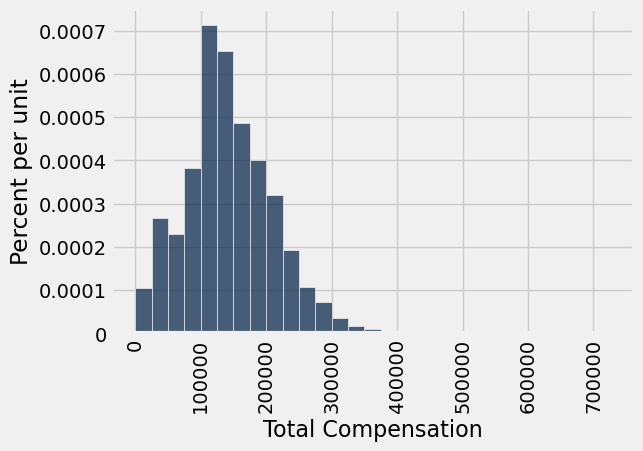

In [14]:
# Visualize the population's total compensation
sf_bins = np.arange(0, 726000, 25000)
sf.hist('Total Compensation', bins=sf_bins);

In [15]:
# Find the median total compensation of the population
# Recall that this is a parameter (ie. it comes from the population)
pop_median = percentile(50, sf.column('Total Compensation'))
pop_median

135747.0

Let's take a look at how just _one_ random sample would look.

In [16]:
# One random sample
our_sample = sf.sample(400, with_replacement=False)

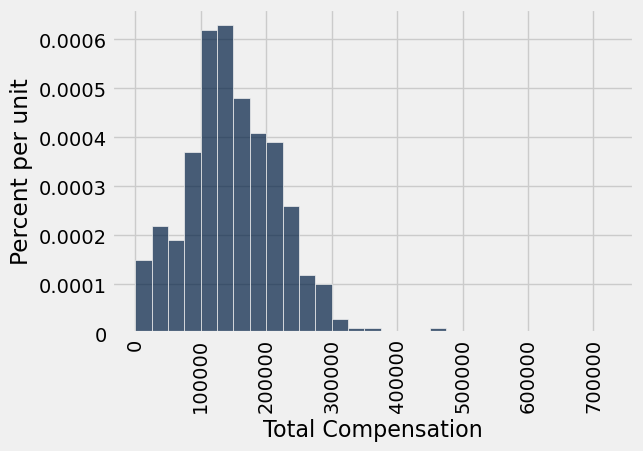

In [17]:
# Visualize our sample's total compensation
our_sample.hist('Total Compensation', bins=sf_bins)

In [18]:
# Find the median total compensation of our sample
our_sample_median = percentile(50, our_sample.column('Total Compensation'))
our_sample_median

141138.0

## The Bootstrap Process ##

Sample randomly
 - from the original sample
 - with replacement
 - the same number of times as the original sample size

In [19]:
# One bootstrap sample (ie. resample)
# Why are there no arguments in the sample method call?
bootstrap_sample = our_sample.sample()

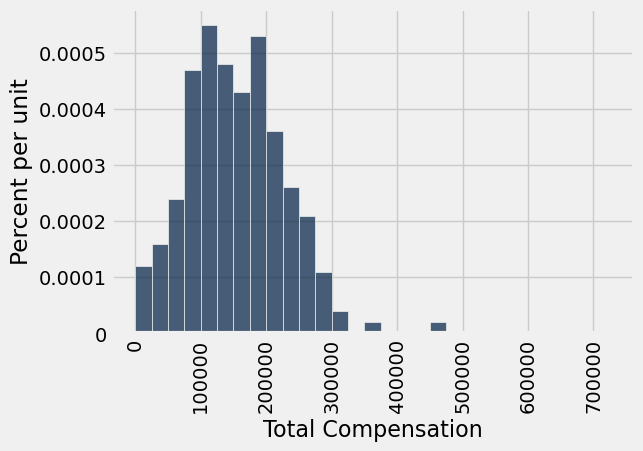

In [20]:
# Visualize our bootstrap sample's total compensation
bootstrap_sample.hist('Total Compensation', bins=sf_bins)

In [21]:
# Find the median total compensation of our sample
percentile(50, bootstrap_sample.column('Total Compensation'))

148944.0

In [22]:
# Default behavior of tbl.sample:
# at random with replacement &
# the same number of times as rows of tbl

def one_bootstrap_median():
    resample = our_sample.sample()
    return percentile(50, resample.column('Total Compensation'))

In [23]:
# Use the function defined above
one_bootstrap_median()

136325.0

In [24]:
# Generate the medians of 3000 bootstrap samples
num_repetitions = 3000
bootstrap_medians = make_array()

for i in np.arange(num_repetitions):
    bootstrap_medians = np.append(bootstrap_medians, one_bootstrap_median())

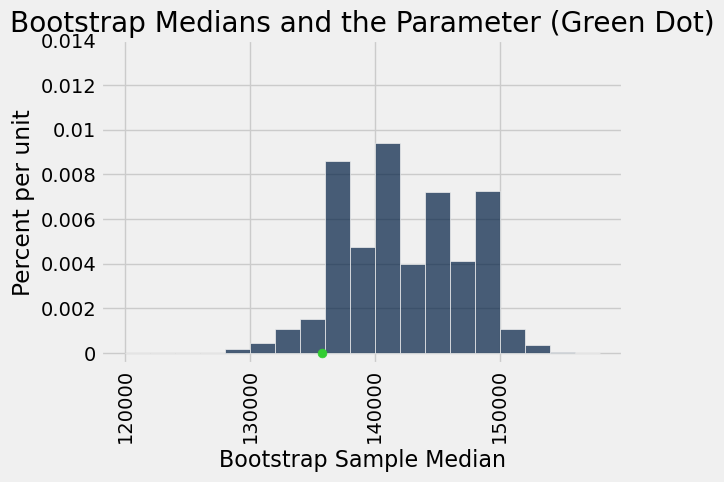

In [25]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bootstrap_medians)

median_bins=np.arange(120000, 160000, 2000)
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.00014)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.title('Bootstrap Medians and the Parameter (Green Dot)');

## 95% Confidence Interval ##

In [26]:
# Create a 95% confidence interval
left = percentile(2.5, bootstrap_medians)
right = percentile(97.5, bootstrap_medians)

make_array(left, right)

array([133696., 150146.])

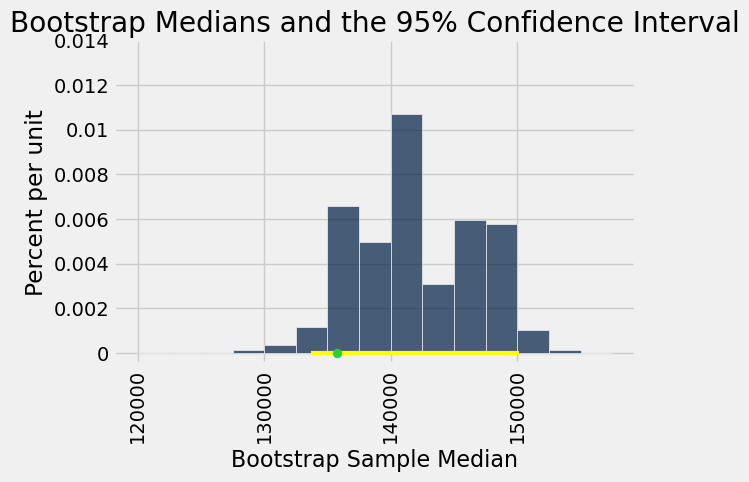

In [27]:
resampled_medians = Table().with_column('Bootstrap Sample Median', bootstrap_medians)

median_bins=np.arange(120000, 160000, 2500)
resampled_medians.hist(bins = median_bins)

# Plotting parameters; you can ignore this code
parameter_green = '#32CD32'
plots.ylim(-0.000005, 0.00014)
plots.plot(make_array(left, right), make_array(0, 0), color='yellow', lw=3, zorder=1)
plots.scatter(pop_median, 0, color=parameter_green, s=40, zorder=2)
plots.title('Bootstrap Medians and the 95% Confidence Interval');